In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [127]:
def DataGet():
    data = pd.read_csv("AER_credit_card_data.csv")
    data['card']=data["card"].map({"yes":1, "no":0})
    data["selfemp"]=data['selfemp'].map({"yes":1, "no":0})
    data["owner"]=data['owner'].map({"yes":1, "no":0})
    y = data['card']#目標列
    X = data.drop(columns="card", axis=1)#特徵
    return X, y, data

In [128]:
X, y, data = DataGet()


In [129]:
def PlotGaussian(mean0, std0, label, color, X):
    sigma = np.sqrt(std0)
    #x = np.linspace(mean0 - 3*sigma, mean0 + 3*sigma, 100)#隨機從中取100個值當變量 根據三西格瑪原則
    X = np.sort(X[(X>=(mean0-3*sigma)) & (X<=(mean0+3*sigma))])
    #1/(std*根號(2pi))*(自然數)**((-1/2)*((x-mean)/std)**2)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)#高斯分布
    plt.plot(X, y, label=f'{label}', color=color)

In [ ]:
for n in X.columns:
    plt.figure(figsize=(15, 10))
    plt.subplot(5, 2, 1)
    PlotGaussian(data[n][data["card"]==1].mean(), data[n][data["card"]==1].std(), f'{n} When card==1', 'red', data[n])
    PlotGaussian(data[n][data["card"]==0].mean(), data[n][data["card"]==0].std(), f'{n} When card==0', 'blue', data[n])
    plt.title(n)
    plt.xlabel(f'{n} Value')
    plt.ylabel('Probability Density')
    plt.legend()

    plt.tight_layout()
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)
    plt.show()
    #plt.savefig(r"D:\Github\Issue_Credit_Card\PlotGaussian.png")

In [131]:
name = "Data1.csv"
data1 = pd.read_csv(name)
target1 = data1["核卡狀況"]
feature_df1 = data1.iloc[:,1:]

In [133]:
print(target)

0        True
1        True
2        True
3        True
4        True
        ...  
1307     True
1308    False
1309     True
1310     True
1311     True
Name: card, Length: 1312, dtype: bool


In [134]:
feature_df.to_csv("DATA.csv", index=False)

計算皮爾森相關系數

In [135]:
print(feature_df.iloc[:,0:3].corr())

               income     share  expenditure
income       1.000000 -0.043427     0.270662
share       -0.043427  1.000000     0.898932
expenditure  0.270662  0.898932     1.000000


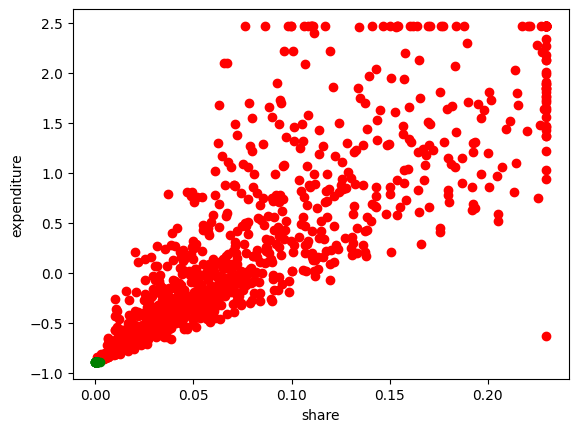

In [136]:

plt.scatter(feature_df.iloc[:, 1][target==1], feature_df.iloc[:, 2][target==1], c="r")
plt.scatter(feature_df.iloc[:, 1][target==0], feature_df.iloc[:, 2][target==0], c="g")
plt.xlabel("share")
plt.ylabel("expenditure")
plt.show()

模型訓練

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn import metrics

混淆矩陣預備評估預測好壞

In [138]:
def matrix(true, pre):#混淆矩陣
    f = metrics.f1_score(true, pre)
    pre_score = metrics.precision_score(true, pre)
    re_score = metrics.recall_score(true, pre)
    print(f"準確率: {pre_score}")
    print(f"召回率: {re_score}")
    print(f"f-measure: {f}")

分割數據

In [139]:
feature_df1.drop(["收支比","每月信用卡支出平均"], axis=1, inplace=True)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(feature_df1, target1, test_size=0.5)
lr = DecisionTreeClassifier()
lr.fit(X_train, y_train)
print(lr.score(X_test,y_test))
matrix(y_test, lr.predict(X_test))
print(feature_df1)

0.7515243902439024
準確率: 0.842
召回率: 0.8336633663366336
f-measure: 0.8378109452736319
          聯徵紀錄  年齡       年收入  扶養人數  居住時間  持有主卡  活躍帳戶  房地產_no  房地產_yes  \
0    -0.339717  37  0.679132     3     4     1    12       0        1   
1    -0.339717  33 -0.558071     3     2     1    13       1        0   
2    -0.339717  33  0.667349     4     4     1     5       0        1   
3    -0.339717  30 -0.487374     0     2     1     7       1        0   
4    -0.339717  32  3.781978     2     5     1     5       0        1   
...        ...  ..       ...   ...   ...   ...   ...     ...      ...   
1307 -0.339717  33  0.706233     0     7     1    19       0        1   
1308  3.368338  23 -0.103252     3     1     1     5       1        0   
1309 -0.339717  40  0.726264     2     0     1     2       0        1   
1310 -0.339717  32  0.196034     0     5     1     7       1        0   
1311 -0.339717  48  0.196034     2     0     1     0       0        1   

      創業人士_no  創業人士_yes  
0           1